# library

In [1]:
import tabint
from tabint.dataset import *
from tabint.pre_processing import *
from tabint.learner import *
from tabint.feature import *

/home/zero/anaconda/envs/fastai-cpu/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/zero/anaconda/envs/fastai-cpu/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# read data

In [2]:
data = pd.read_csv('/media/zero/dropbox/Dropbox/metadata/viettel/bai 1/junction_postvip_sum_6mon_enr.txt', 
                   sep = "|", header = None)

In [3]:
header = pd.read_excel('/media/zero/dropbox/Dropbox/metadata/viettel/bai 1/Danh_sach_truong_bai_1.xlsx')

In [4]:
data.columns = header['Thuộc tính'].values

In [5]:
data.customer_age.unique() #hmm

array([35, 32, 39, 37, 38, 36, 33, 34, 40, 30, 31])

# pre processing

In [6]:
df = data[:50000]

In [7]:
df, y, pp_outp = tabular_proc(df, 'churn', [fill_na(), app_cat(), dummies()])

In [8]:
ds = TBDataset.from_SKSplit(df, y, pp_outp['cons'], pp_outp['cats'])

# fit 

In [9]:
learner = LGBLearner()

In [10]:
params = {
    'task': 'train',
    'objective': 'binary',
    'n_estimators':2000,
    'learning_rate':0.03,
    'num_leaves':20,
    'colsample_bytree':.8,
    'subsample':.9,
    'max_depth':7,
    'reg_alpha':.2,
    'reg_lambda':.2,
    'min_split_gain':.01,
    'min_child_weight':2,
    'verbose':-1,
    #'is_unbalance': 'true',
    'metric':'binary_logloss'}
learner.fit(params, *ds.trn, *ds.val)

/home/zero/anaconda/envs/fastai-cpu/lib/python3.6/site-packages/lightgbm/engine.py:99: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.0844342	valid_1's binary_logloss: 0.0875446
[200]	training's binary_logloss: 0.0590654	valid_1's binary_logloss: 0.073351
[300]	training's binary_logloss: 0.0486453	valid_1's binary_logloss: 0.0724642
[400]	training's binary_logloss: 0.0413544	valid_1's binary_logloss: 0.0727055
Early stopping, best iteration is:
[304]	training's binary_logloss: 0.0482968	valid_1's binary_logloss: 0.072428


In [11]:
roc = ReceiverOperatingCharacteristic.from_learner(learner, *ds.val)

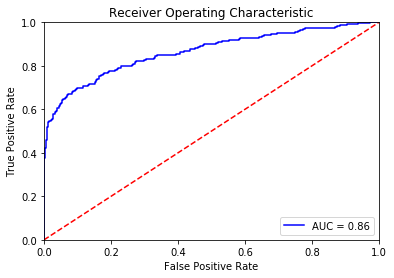

In [12]:
roc.plot()

In [13]:
kde = KernelDensityEstimation.from_learner(learner, *ds.val)

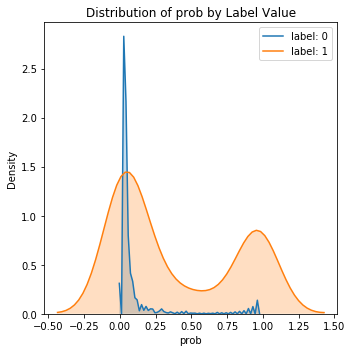

In [14]:
kde.plot()

# feature correlation

In [15]:
ddg = Dendogram.from_df(ds.x_trn)

/home/zero/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/zero/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/zero/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/zero/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/zero/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


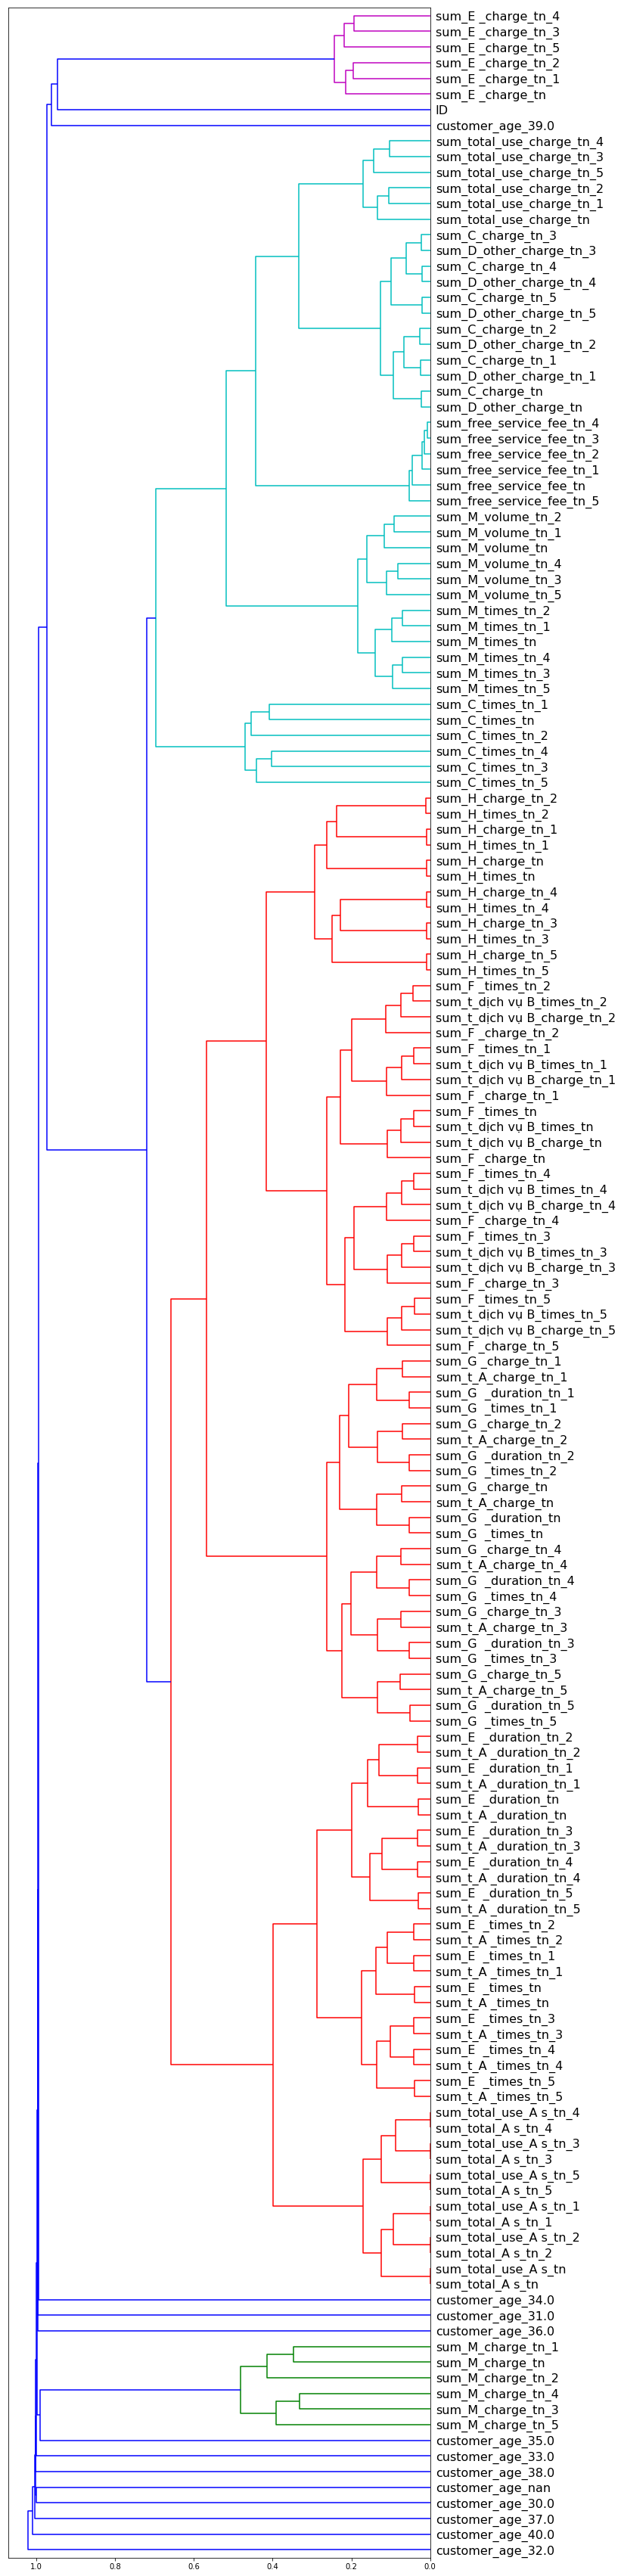

In [16]:
ddg.plot()

In [17]:
group_cols = [['sum_E _charge_tn', 'sum_E _charge_tn_1', 'sum_E _charge_tn_2', 'sum_E _charge_tn_3', 'sum_E _charge_tn_4', 'sum_E _charge_tn_5'],
             ['sum_total_use_charge_tn', 'sum_total_use_charge_tn_1', 'sum_total_use_charge_tn_2', 'sum_total_use_charge_tn_3', 'sum_total_use_charge_tn_4',  'sum_total_use_charge_tn_5'],
             ['sum_D_other_charge_tn', 'sum_D_other_charge_tn_1', 'sum_D_other_charge_tn_2', 'sum_D_other_charge_tn_3', 'sum_D_other_charge_tn_4', 'sum_D_other_charge_tn_5',
             'sum_C_charge_tn', 'sum_C_charge_tn_1', 'sum_C_charge_tn_2', 'sum_C_charge_tn_3', 'sum_C_charge_tn_4','sum_C_charge_tn_5'],
             ['sum_free_service_fee_tn', 'sum_free_service_fee_tn_1', 'sum_free_service_fee_tn_2',  'sum_free_service_fee_tn_3',  'sum_free_service_fee_tn_4',  'sum_free_service_fee_tn_5'],
             ['sum_M_volume_tn', 'sum_M_volume_tn_1', 'sum_M_volume_tn_2', 'sum_M_volume_tn_3', 'sum_M_volume_tn_4', 'sum_M_volume_tn_5'],
             ['sum_M_times_tn', 'sum_M_times_tn_1', 'sum_M_times_tn_2',  'sum_M_times_tn_3',  'sum_M_times_tn_4',  'sum_M_times_tn_5'],
             ['sum_C_times_tn', 'sum_C_times_tn_1', 'sum_C_times_tn_2', 'sum_C_times_tn_3', 'sum_C_times_tn_4', 'sum_C_times_tn_5'],
             ['sum_H_times_tn', 'sum_H_times_tn_1', 'sum_H_times_tn_2', 'sum_H_times_tn_3', 'sum_H_times_tn_4', 'sum_H_times_tn_5',
             'sum_H_charge_tn', 'sum_H_charge_tn_1', 'sum_H_charge_tn_2', 'sum_H_charge_tn_3', 'sum_H_charge_tn_4', 'sum_H_charge_tn_5'],
             ['sum_t_dịch vụ B_charge_tn', 'sum_t_dịch vụ B_charge_tn_1', 'sum_t_dịch vụ B_charge_tn_2', 'sum_t_dịch vụ B_charge_tn_3', 'sum_t_dịch vụ B_charge_tn_4', 'sum_t_dịch vụ B_charge_tn_5',
             'sum_t_dịch vụ B_times_tn', 'sum_t_dịch vụ B_times_tn_1', 'sum_t_dịch vụ B_times_tn_2', 'sum_t_dịch vụ B_times_tn_3',  'sum_t_dịch vụ B_times_tn_4', 'sum_t_dịch vụ B_times_tn_5',
             'sum_F _times_tn', 'sum_F _times_tn_1', 'sum_F _times_tn_2', 'sum_F _times_tn_3', 'sum_F _times_tn_4', 'sum_F _times_tn_5',
             'sum_F _charge_tn', 'sum_F _charge_tn_1', 'sum_F _charge_tn_2', 'sum_F _charge_tn_3', 'sum_F _charge_tn_4', 'sum_F _charge_tn_5'],
             ['sum_t_A_charge_tn', 'sum_t_A_charge_tn_1', 'sum_t_A_charge_tn_2', 'sum_t_A_charge_tn_3', 'sum_t_A_charge_tn_4', 'sum_t_A_charge_tn_5',
             'sum_G _charge_tn', 'sum_G _charge_tn_1', 'sum_G _charge_tn_2', 'sum_G _charge_tn_3', 'sum_G _charge_tn_4', 'sum_G _charge_tn_5',
             'sum_G  _times_tn', 'sum_G  _times_tn_1', 'sum_G  _times_tn_2', 'sum_G  _times_tn_3', 'sum_G  _times_tn_4', 'sum_G  _times_tn_5',
             'sum_G  _duration_tn', 'sum_G  _duration_tn_1', 'sum_G  _duration_tn_2', 'sum_G  _duration_tn_3', 'sum_G  _duration_tn_4', 'sum_G  _duration_tn_5'],
             ['sum_t_A _duration_tn', 'sum_t_A _duration_tn_1', 'sum_t_A _duration_tn_2', 'sum_t_A _duration_tn_3', 'sum_t_A _duration_tn_4', 'sum_t_A _duration_tn_5',
             'sum_E  _duration_tn', 'sum_E  _duration_tn_1', 'sum_E  _duration_tn_2', 'sum_E  _duration_tn_3', 'sum_E  _duration_tn_4', 'sum_E  _duration_tn_5',
             'sum_t_A _times_tn', 'sum_t_A _times_tn_1', 'sum_t_A _times_tn_2', 'sum_t_A _times_tn_3', 'sum_t_A _times_tn_4', 'sum_t_A _times_tn_5',
             'sum_E  _times_tn', 'sum_E  _times_tn_1',  'sum_E  _times_tn_2',  'sum_E  _times_tn_3',  'sum_E  _times_tn_4', 'sum_E  _times_tn_5'],
              ['sum_total_A s_tn', 'sum_total_A s_tn_1', 'sum_total_A s_tn_2', 'sum_total_A s_tn_3', 'sum_total_A s_tn_4', 'sum_total_A s_tn_5',
             'sum_total_use_A s_tn', 'sum_total_use_A s_tn_1', 'sum_total_use_A s_tn_2', 'sum_total_use_A s_tn_3', 'sum_total_use_A s_tn_4', 'sum_total_use_A s_tn_5'],
              ['sum_M_charge_tn', 'sum_M_charge_tn_1', 'sum_M_charge_tn_2', 'sum_M_charge_tn_3', 'sum_M_charge_tn_4','sum_M_charge_tn_5'] ]

In [18]:
impt = Importance.from_Learner(learner, ds, group_cols = group_cols)

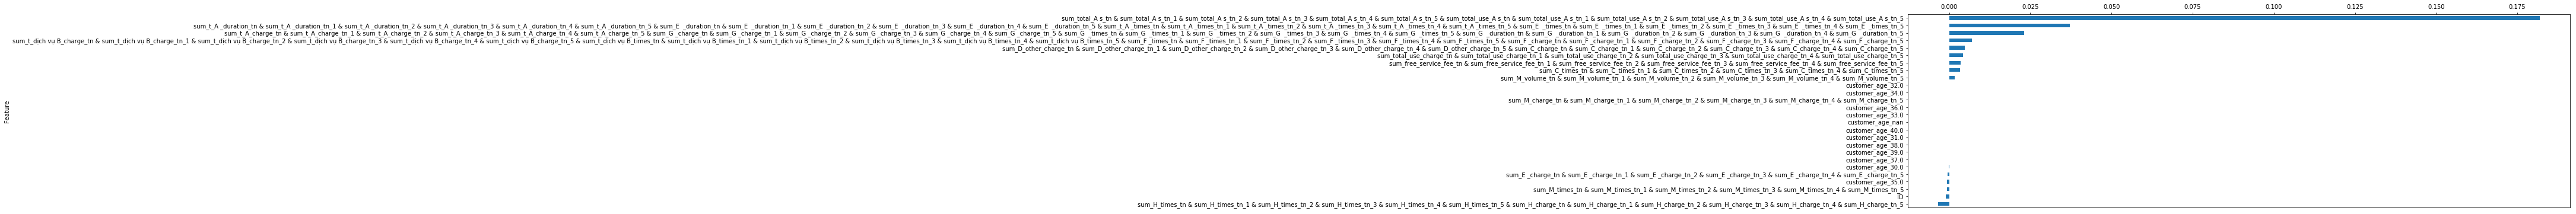

In [19]:
impt.plot()

# feature importance

In [21]:
str(impt.top_features(8))

"['sum_total_A s_tn', 'sum_total_A s_tn_1', 'sum_total_A s_tn_2', 'sum_total_A s_tn_3', 'sum_total_A s_tn_4', 'sum_total_A s_tn_5', 'sum_total_use_A s_tn', 'sum_total_use_A s_tn_1', 'sum_total_use_A s_tn_2', 'sum_total_use_A s_tn_3', 'sum_total_use_A s_tn_4', 'sum_total_use_A s_tn_5', 'sum_t_A _duration_tn', 'sum_t_A _duration_tn_1', 'sum_t_A _duration_tn_2', 'sum_t_A _duration_tn_3', 'sum_t_A _duration_tn_4', 'sum_t_A _duration_tn_5', 'sum_E  _duration_tn', 'sum_E  _duration_tn_1', 'sum_E  _duration_tn_2', 'sum_E  _duration_tn_3', 'sum_E  _duration_tn_4', 'sum_E  _duration_tn_5', 'sum_t_A _times_tn', 'sum_t_A _times_tn_1', 'sum_t_A _times_tn_2', 'sum_t_A _times_tn_3', 'sum_t_A _times_tn_4', 'sum_t_A _times_tn_5', 'sum_E  _times_tn', 'sum_E  _times_tn_1', 'sum_E  _times_tn_2', 'sum_E  _times_tn_3', 'sum_E  _times_tn_4', 'sum_E  _times_tn_5', 'sum_t_A_charge_tn', 'sum_t_A_charge_tn_1', 'sum_t_A_charge_tn_2', 'sum_t_A_charge_tn_3', 'sum_t_A_charge_tn_4', 'sum_t_A_charge_tn_5', 'sum_G _ch

In [22]:
top_fts = impt.top_features(8)

In [23]:
ds.keep(top_fts)

# refit with all data

In [24]:
learner.fit(params, *ds.trn, *ds.val)

Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.0842928	valid_1's binary_logloss: 0.0873574
Did not meet early stopping. Best iteration is:
[100]	training's binary_logloss: 0.0842928	valid_1's binary_logloss: 0.0873574


In [26]:
kde = KernelDensityEstimation.from_learner(learner, *ds.val)

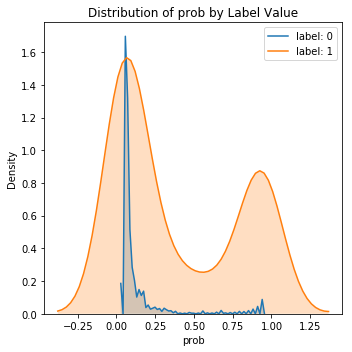

In [27]:
kde.plot()

# fit with all data

In [29]:
df, y, pp_outp = tabular_proc(data, 'churn', [fill_na(), app_cat(), dummies()])
ds = TBDataset.from_SKSplit(df, y, pp_outp['cons'], pp_outp['cats'])

In [31]:
ds.keep(top_fts)

In [32]:
learner.fit(params, *ds.trn, *ds.val)

Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.0875807	valid_1's binary_logloss: 0.0891193
Did not meet early stopping. Best iteration is:
[100]	training's binary_logloss: 0.0875807	valid_1's binary_logloss: 0.0891193


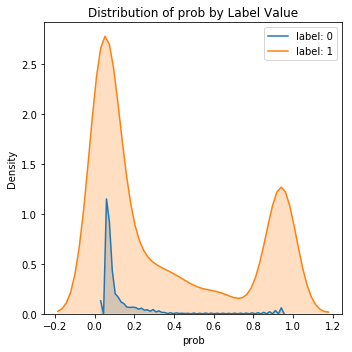

In [33]:
kde = KernelDensityEstimation.from_learner(learner, *ds.val)
kde.plot()

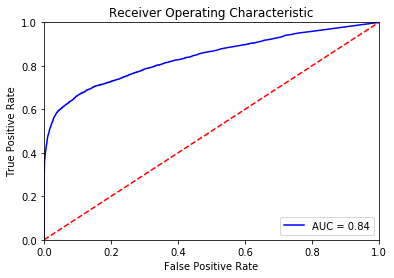

In [34]:
roc = ReceiverOperatingCharacteristic.from_learner(learner, *ds.val)
roc.plot()